In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



irs.data [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

irs.target [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

irs.target_names ['setosa' 'versicolor' 'virginica']

irs.feature_names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

***************** [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]


Text(0, 0.5, 'y')

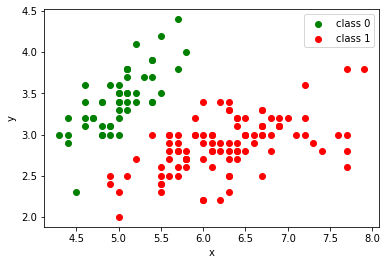

In [7]:
iris=datasets.load_iris()
X=iris.data[:,:2] #les deux derniers colonnes 
y=[]
print('\nirs.data',iris.data[0:5,:2])
print('\nirs.target',iris.target)
print('\nirs.target_names',iris.target_names)
print('\nirs.feature_names',iris.feature_names)
for e in iris.target:
    if e==0: y+=[0]
    else: y+=[1]  #pour garder juste deux val(classification binaire)
y=np.array(y)
plt.scatter(X[y==0][:,0],X[y==0][:,1],color='g')  
print("\n*****************",X[y==0][:,0])
#En vert les fleurs ayant l'étiquette 0
plt.scatter(X[y==1][:,0],X[y==1][:,1],color='r')
#En rouge les fleurs ayant l'étiquette 1
plt.legend(labels=("class 0","class 1"));
plt.xlabel("x")
plt.ylabel("y")



In [16]:
model=LogisticRegression(C=1e20)#teste ravec 0.01 pour eviter l'overfiting
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) #random state pour donner le mme testing data dans difernets machines
model.fit(x_train,y_train)
score1=model.score(x_test,y_test)
score2=model.score(x_train,y_train)
print("score sur test-set = "+str(score1*100)+'%')
print("score sur train-set = "+str(score2*100)+'%')

theta0=model.intercept_;theta1=model.coef_[0][0];theta2=model.coef_[0][1]
Iries_To_Predict=[ [5.5,2.5],[7,3],[3,2],[5,3]]
#demande de prediction
print(model.predict(Iries_To_Predict))
score=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
print("s=",score)
print("s_m=",score.mean())
def fct_reg_logistic(x1,x2):
    z=(theta0+theta1*x1+(theta2*x2))
    return(z)
print([fct_reg_logistic(e[0],e[1])for e in Iries_To_Predict])       

score sur test-set = 100.0%
score sur train-set = 100.0%
[1 1 0 0]
s= [1.         1.         0.95833333 1.         1.        ]
s_m= 0.9916666666666668
[array([93.91809462]), array([222.09084866]), array([-166.61191762]), array([-42.62366775])]
